# Bike rental case study

## Multiple Linear Regression

### Problem Statement:
BoomBikes is a US based bike sharing company. Company wants to understand the significant parameters that drive the bike demand.
We have the data set for 2018 and 2019 with several parameters like months, seasons, temperature, weather condition etc.<br>
Company wants to know
1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands


### Approach:
We are concerned about determining the driver variables for bike demand. This is the case of prediction rather than projection where we are more interested in predicting the key driver variables and their impact rather than forecasting the results.

First we will list down the potential parameters impacting bike demand<br>

The potential parameters:
1. Year
2. Weather situation
3. Working day or holiday
4. Temperature, humidity and wind speed
5. Season

### Data
We have been given data for the period of 2018 and 2019<br>
With Columns as<br> 
yr                 : Year 0-2018 , 1- 2019<br>
mnth               : Month<br>
holiday	           : IF the day is holiday or not 0 - not a holiday , 1 -holiday<br>
temp	           : Temperature<br>
atemp              : Temperature as felt<br>
hum                : Humidity<br>
windspeed          : Wind speed<br>
weekday            : Day of the week encoded by number 0 to 6<br>
workingday         : Day is a working day or not , 1- working day 0- not a working day<br>
cnt                : Target variable indicating bike demand<br>

In [1421]:
# Import required librarie for data processing and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1422]:
#read the data from the csv file
bike_data = pd.read_csv("day.csv")
bike_data.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Inspect the Data

In [1423]:
#number of rows and columns
bike_data.shape 

(730, 16)

In [1424]:
#datatypes of each column
print(bike_data.dtypes) 
# check for null values
print(bike_data.isnull().sum())

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [1425]:
# Remove unnecessary data like  casual and registered columns
bike_data = bike_data.drop(['instant', 'casual', 'registered'], axis=1)

In [1426]:
# Date has no much significance to the data as week day, month and year are already present in the dataset, dropping date column
bike_data = bike_data.drop(['dteday'], axis=1)


# Exploratory Data Analysis

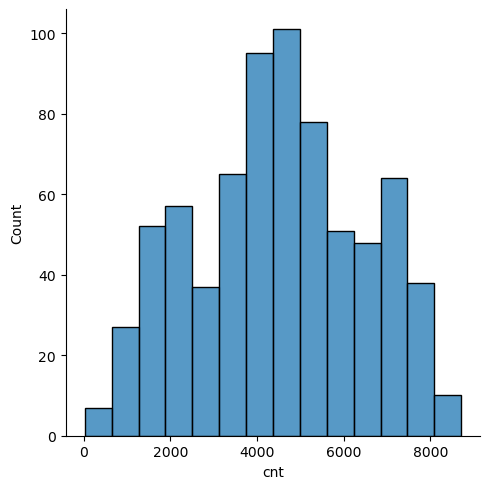

In [1427]:
#univariate analysis of the target variable
sns.displot(bike_data['cnt'])
plt.show()

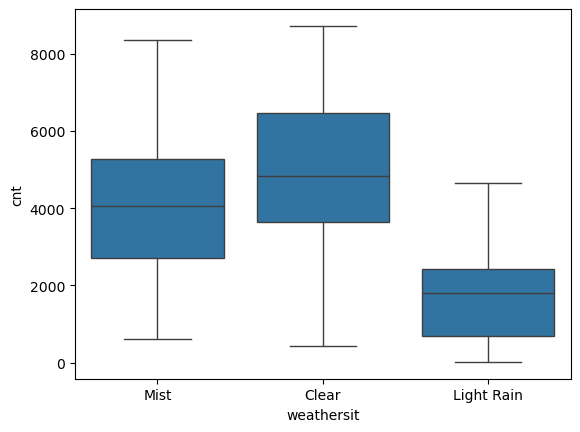

In [1428]:
# converting weather situation to its meaning for better understanding
bike_data['weathersit'] = bike_data['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'})


#plot distribution of weather situation
sns.boxplot(x=bike_data['weathersit'], y=bike_data['cnt'])
plt.show()

#convert weather situation back to its original values
bike_data['weathersit'] = bike_data['weathersit'].map({'Clear': 1, 'Mist': 2, 'Light Rain': 3, 'Heavy Rain': 4})

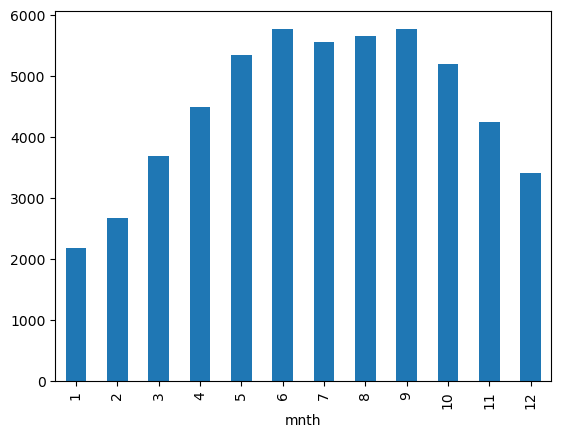

In [1429]:
bike_data.groupby('mnth')['cnt'].mean().plot(kind='bar')
plt.show()

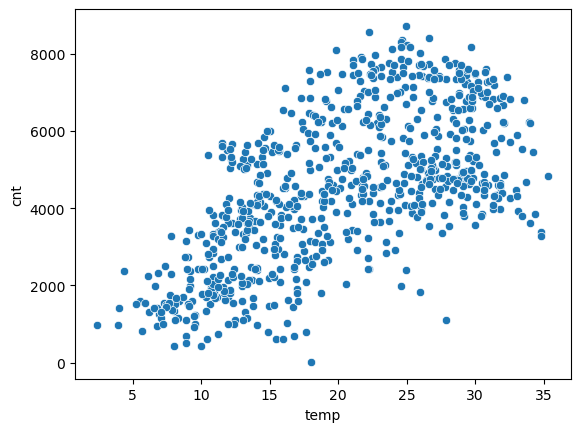

In [1430]:
# Plotting temperature and demand
sns.scatterplot(x = bike_data['temp'], y = bike_data['cnt'])
plt.show()

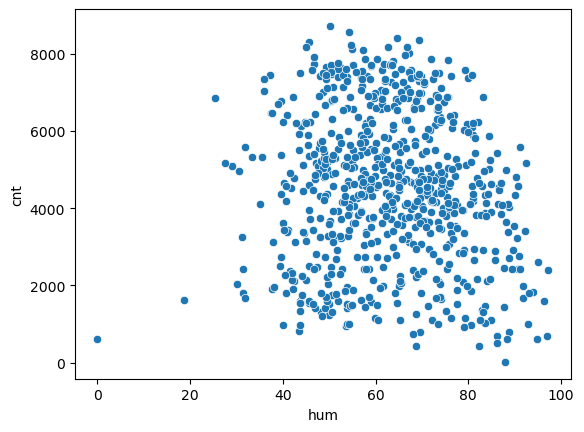

In [1431]:
# humidity vs demand
sns.scatterplot(x = bike_data['hum'], y = bike_data['cnt'])
plt.show()

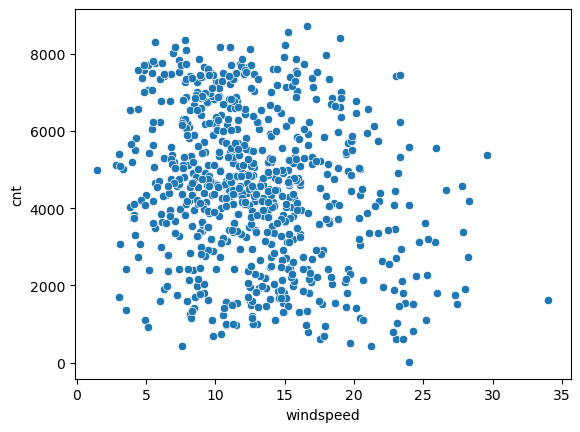

In [1432]:
# windspeed vs demand
sns.scatterplot(x = bike_data['windspeed'], y = bike_data['cnt'])
plt.show()

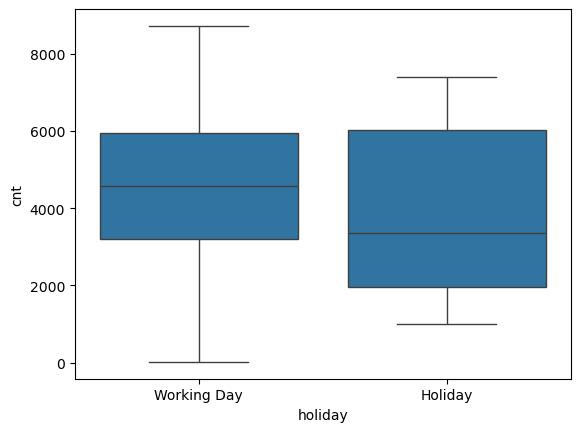

In [1433]:
# convert holiday to meaningful values
bike_data['holiday'] = bike_data['holiday'].map({0: 'Working Day', 1: 'Holiday'})

#plot the graph for holiday , week day and working day
sns.boxplot(x=bike_data['holiday'], y=bike_data['cnt'])
plt.show()
# covert back to original values
bike_data['holiday'] = bike_data['holiday'].map({'Working Day': 0, 'Holiday': 1})

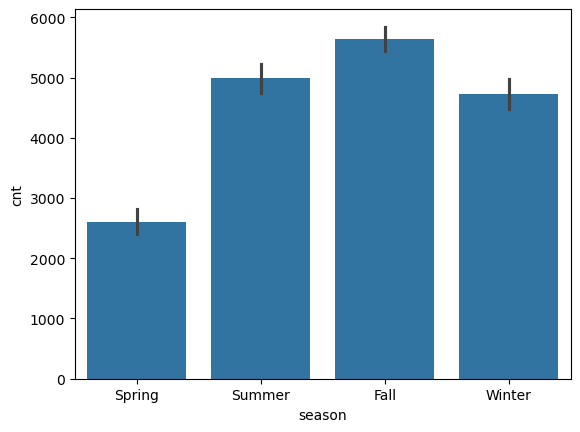

In [1434]:
#converting season to its meaning for better understanding
bike_data['season'] = bike_data['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# plotting the graph for season and demand
sns.barplot(x=bike_data['season'], y=bike_data['cnt'])
plt.show()

#converting season back to its original values
bike_data['season'] = bike_data['season'].map({'Spring': 1, 'Summer': 2, 'Fall': 3, 'Winter': 4})

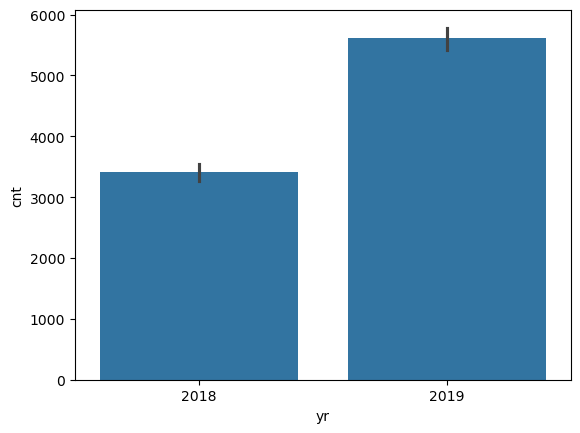

In [1435]:
# coverting year to meaningful values
bike_data['yr'] = bike_data['yr'].map({0: '2018', 1: '2019'})

# plotting graph for year and demand
sns.barplot(x=bike_data['yr'], y=bike_data['cnt']) 
plt.show()

# converting year back to its original values
bike_data['yr'] = bike_data['yr'].map({'2018': 0, '2019': 1})

## Corelation matrix of numerical variables

<Axes: >

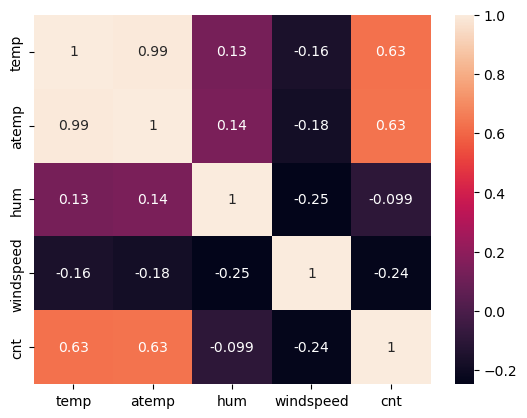

In [1436]:

#selecting only numerical vairables for heat map and drawing heat map
sns.heatmap(bike_data[['temp','atemp','hum','windspeed','cnt']].corr(),annot=True)

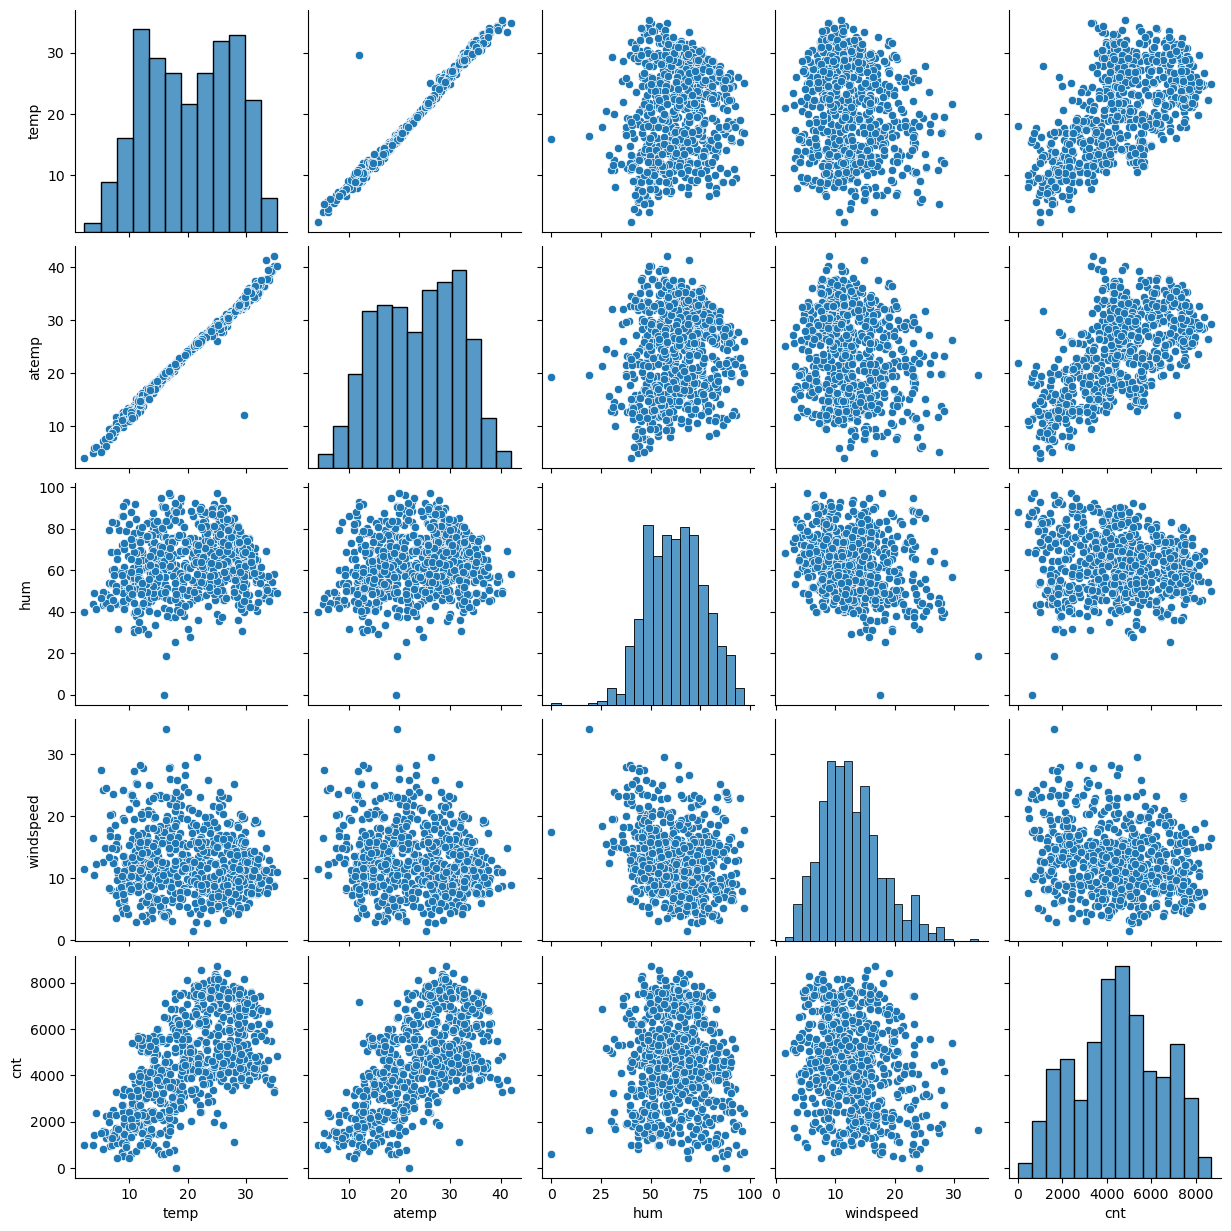

In [1437]:
# creating pairplot for the numerical variables
sns.pairplot(bike_data[['temp','atemp','hum','windspeed','cnt']])
plt.show()

In [1438]:
# as here is a very high correlation between temp and atemp, we can drop one of them
bike_data = bike_data.drop(['atemp'], axis=1)


In [1439]:
#adding dummy variables for season, weathersit, mnth, weekday
bike_data = pd.get_dummies(bike_data, columns=['season', 'weathersit', 'mnth', 'weekday'], drop_first=True)
bike_data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_2', 'season_3', 'season_4', 'weathersit_2', 'weathersit_3',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

# Preparing the model 

In [1440]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

#splitting the data into train and test
train, test = train_test_split(bike_data, train_size=0.7,random_state=100)
#splitting the data into x and y
train_x = train.drop(['cnt'], axis=1)
train_y = train['cnt']
test_x = test.drop(['cnt'], axis=1)
test_y = test['cnt']
# adding constant to train_x
train_x = sm.add_constant(train_x)

cols_needed = ['season_2', 'season_3', 'season_4', 'weathersit_2', 'weathersit_3',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6']
#converting boolean data to integer
for col in cols_needed:
    train_x[col] = train_x[col].astype(int)

for col in cols_needed:
    test_x[col] = test_x[col].astype(int)

test_x = sm.add_constant(test_x)

# Apply Min-Max Scaling
scaler = MinMaxScaler()
num_cols = ['temp', 'hum', 'windspeed']
train_x[num_cols] = scaler.fit_transform(train_x[num_cols])
test_x[num_cols] = scaler.transform(test_x[num_cols])

# Copying the data to new variables for RFE analysis later
train_x_rfe = train_x
test_x_rfe = test_x



In [1441]:
#creating and fitting model
model = sm.OLS(train_y, train_x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          3.00e-181
Time:                        22:28:45   Log-Likelihood:                -4098.8
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     482   BIC:                             8372.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1554.3209    264.335      5.880   

## Calculating VIF of variables
VIF= 1/(1- 1/R2)
​


In [1442]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#ignore warnings
import warnings
warnings.filterwarnings('ignore')
#checking for multicollinearity
vif = pd.DataFrame()
vif['Features'] = train_x.columns
vif['VIF'] = [variance_inflation_factor(train_x.values, i) for i in range(train_x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
25,weekday_3,inf
2,holiday,inf
3,workingday,inf
23,weekday_1,inf
27,weekday_5,inf
26,weekday_4,inf
24,weekday_2,inf
0,const,60.14
8,season_3,11.31
18,mnth_8,9.80


In [1443]:
#model 2 with dropping workingday column as it leads to infinite VIF
train_x = train_x.drop(['workingday'], axis=1)
model_1 = sm.OLS(train_y, train_x).fit()
print(model_1.summary())
vif = pd.DataFrame()
vif['Features'] = train_x.columns
vif['VIF'] = [variance_inflation_factor(train_x.values, i) for i in range(train_x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          3.00e-181
Time:                        22:28:45   Log-Likelihood:                -4098.8
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     482   BIC:                             8372.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1554.3209    264.335      5.880   

,Features,VIF
0,const,60.14
7,season_3,11.31
17,mnth_8,9.80
16,mnth_7,8.82
8,season_4,8.15
3,temp,7.08
15,mnth_6,6.90
6,season_2,6.74
18,mnth_9,6.70
14,mnth_5,6.57


In [1444]:
#model 2 with dropping mnth_7 column as it has high P value and VIF
train_x = train_x.drop(['mnth_7'], axis=1)
model_2 = sm.OLS(train_y, train_x).fit()
print(model_2.summary())

vif = pd.DataFrame()
vif['Features'] = train_x.columns
vif['VIF'] = [variance_inflation_factor(train_x.values, i) for i in range(train_x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     107.3
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          3.58e-182
Time:                        22:28:45   Log-Likelihood:                -4099.0
No. Observations:                 510   AIC:                             8252.
Df Residuals:                     483   BIC:                             8366.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1565.3348    263.677      5.937   

,Features,VIF
0,const,59.91
8,season_4,7.38
7,season_3,7.32
6,season_2,5.75
3,temp,4.66
19,mnth_11,4.12
18,mnth_10,3.96
14,mnth_5,3.56
13,mnth_4,3.25
20,mnth_12,2.73


In [1445]:
#model 3 with dropping mnth_11 column as it has high P value
train_x = train_x.drop(['mnth_11'], axis=1)
model_3 = sm.OLS(train_y, train_x).fit()
print(model_3.summary())

vif = pd.DataFrame()
vif['Features'] = train_x.columns
vif['VIF'] = [variance_inflation_factor(train_x.values, i) for i in range(train_x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.8
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          3.68e-183
Time:                        22:28:46   Log-Likelihood:                -4099.1
No. Observations:                 510   AIC:                             8250.
Df Residuals:                     484   BIC:                             8360.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1576.1728    262.271      6.010   

,Features,VIF
0,const,59.37
7,season_3,7.24
6,season_2,5.74
3,temp,4.57
14,mnth_5,3.53
13,mnth_4,3.20
8,season_4,3.10
15,mnth_6,2.38
4,hum,2.01
12,mnth_3,1.88


In [1446]:

#model 4 with dropping mnth_12 column as it has high P value
train_x = train_x.drop(['mnth_12'], axis=1)
model_4 = sm.OLS(train_y, train_x).fit()
print(model_4.summary())

vif = pd.DataFrame()
vif['Features'] = train_x.columns
vif['VIF'] = [variance_inflation_factor(train_x.values, i) for i in range(train_x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.6
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          3.45e-184
Time:                        22:28:46   Log-Likelihood:                -4099.1
No. Observations:                 510   AIC:                             8248.
Df Residuals:                     485   BIC:                             8354.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1580.9022    261.056      6.056   

,Features,VIF
0,const,58.94
7,season_3,7.24
6,season_2,5.74
3,temp,4.52
14,mnth_5,3.52
13,mnth_4,3.18
8,season_4,2.98
15,mnth_6,2.37
4,hum,1.99
19,weekday_1,1.86


In [1447]:
#model 5 with dropping mnth_2 column as it has high P value
train_x = train_x.drop(['mnth_2'], axis=1)
model_5 = sm.OLS(train_y, train_x).fit()
print(model_5.summary())

vif = pd.DataFrame()
vif['Features'] = train_x.columns
vif['VIF'] = [variance_inflation_factor(train_x.values, i) for i in range(train_x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     121.5
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          7.00e-185
Time:                        22:28:46   Log-Likelihood:                -4100.0
No. Observations:                 510   AIC:                             8248.
Df Residuals:                     486   BIC:                             8350.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1662.1061    253.463      6.558   

,Features,VIF
0,const,55.49
7,season_3,6.68
6,season_2,5.65
3,temp,4.51
13,mnth_5,3.43
12,mnth_4,3.09
8,season_4,2.45
14,mnth_6,2.32
4,hum,1.98
18,weekday_1,1.86


In [1448]:

#model 6 with dropping mnth_4 column as it has high P value
train_x = train_x.drop(['mnth_4'], axis=1)
model_6 = sm.OLS(train_y, train_x).fit()
print(model_6.summary())

vif = pd.DataFrame()
vif['Features'] = train_x.columns
vif['VIF'] = [variance_inflation_factor(train_x.values, i) for i in range(train_x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     126.5
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          2.28e-185
Time:                        22:28:46   Log-Likelihood:                -4101.4
No. Observations:                 510   AIC:                             8249.
Df Residuals:                     487   BIC:                             8346.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1694.6631    253.097      6.696   

,Features,VIF
0,const,55.14
7,season_3,6.67
3,temp,4.48
6,season_2,2.88
8,season_4,2.41
4,hum,1.97
17,weekday_1,1.86
12,mnth_5,1.84
19,weekday_3,1.81
22,weekday_6,1.79


In [1449]:
#model 7 with dropping mnth_6 column as it has high P value
train_x = train_x.drop(['mnth_6'], axis=1)
model_7 = sm.OLS(train_y, train_x).fit()
print(model_7.summary())

vif = pd.DataFrame()
vif['Features'] = train_x.columns
vif['VIF'] = [variance_inflation_factor(train_x.values, i) for i in range(train_x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     132.4
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          3.63e-186
Time:                        22:28:46   Log-Likelihood:                -4102.0
No. Observations:                 510   AIC:                             8248.
Df Residuals:                     488   BIC:                             8341.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1691.1597    253.142      6.681   

,Features,VIF
0,const,55.13
7,season_3,6.51
3,temp,3.85
6,season_2,2.84
8,season_4,2.37
4,hum,1.96
16,weekday_1,1.86
18,weekday_3,1.81
21,weekday_6,1.79
19,weekday_4,1.71


In [1450]:
#model 8 with dropping mnth_5 column as it has high P value
train_x = train_x.drop(['mnth_5'], axis=1)
model_8 = sm.OLS(train_y, train_x).fit()
print(model_8.summary())

vif = pd.DataFrame()
vif['Features'] = train_x.columns
vif['VIF'] = [variance_inflation_factor(train_x.values, i) for i in range(train_x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     138.4
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          1.01e-186
Time:                        22:28:46   Log-Likelihood:                -4103.3
No. Observations:                 510   AIC:                             8249.
Df Residuals:                     489   BIC:                             8337.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1646.2282    251.852      6.536   

,Features,VIF
0,const,54.41
7,season_3,6.31
3,temp,3.73
6,season_2,2.67
8,season_4,2.33
4,hum,1.92
15,weekday_1,1.86
17,weekday_3,1.81
20,weekday_6,1.79
18,weekday_4,1.71


In [1451]:
#model 9 with dropping season_3 column as it has high VIF value
train_x = train_x.drop(['season_3'], axis=1)
model_9 = sm.OLS(train_y, train_x).fit()
print(model_9.summary())

vif = pd.DataFrame()
vif['Features'] = train_x.columns
vif['VIF'] = [variance_inflation_factor(train_x.values, i) for i in range(train_x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     145.0
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          3.55e-187
Time:                        22:28:46   Log-Likelihood:                -4104.8
No. Observations:                 510   AIC:                             8250.
Df Residuals:                     490   BIC:                             8334.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1651.3428    252.334      6.544   

,Features,VIF
0,const,54.41
4,hum,1.88
14,weekday_1,1.85
16,weekday_3,1.81
19,weekday_6,1.79
7,season_4,1.78
17,weekday_4,1.71
15,weekday_2,1.68
18,weekday_5,1.68
3,temp,1.63


In [1452]:
#model 10 with dropping mnth_3 column as it has high P value
train_x = train_x.drop(['mnth_3'], axis=1)
model_10 = sm.OLS(train_y, train_x).fit()
print(model_10.summary())

vif = pd.DataFrame()
vif['Features'] = train_x.columns
vif['VIF'] = [variance_inflation_factor(train_x.values, i) for i in range(train_x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     152.6
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          8.47e-188
Time:                        22:28:46   Log-Likelihood:                -4106.0
No. Observations:                 510   AIC:                             8250.
Df Residuals:                     491   BIC:                             8330.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1694.8359    250.940      6.754   

,Features,VIF
0,const,53.68
4,hum,1.88
13,weekday_1,1.85
15,weekday_3,1.81
18,weekday_6,1.79
7,season_4,1.71
16,weekday_4,1.70
14,weekday_2,1.68
17,weekday_5,1.68
3,temp,1.59


In [1453]:
text_x_cols = train_x.columns

## Creating model with SK learn and validating it with test data

In [1454]:
# model 1 :
lr_sk_m1 = LinearRegression()
lr_sk_m1.fit(train_x,train_y)

LinearRegression()

In [1455]:
# chosing the required columns for model testing
test_x = test_x[text_x_cols]
#add constant to test1_x
test_x = sm.add_constant(test_x)
y_pred = lr_sk_m1.predict(test_x)
#calcualting the R square value
r2_score(test_y,y_pred)

0.8158779749333451

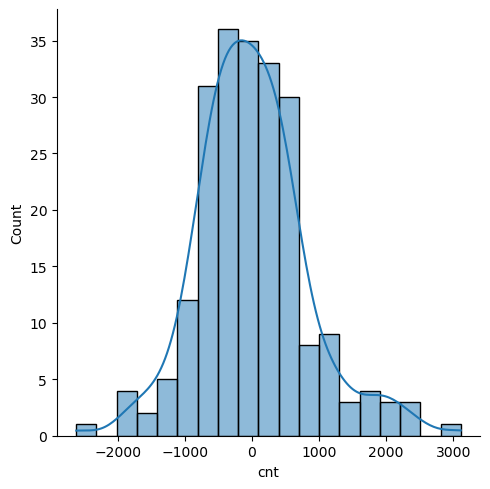

In [1456]:
# plotting Residuals
residuals = y_pred-test_y
sns.displot(residuals, kde=True)
plt.show()

# Feature selection with RFE

In [1457]:
# Define model (Linear Regression)
rfe_model = LinearRegression()

# Define RFE with number of features to keep (e.g., 10 best features)
rfe = RFE(estimator=rfe_model, n_features_to_select=12)

# Fit RFE on training data
rfe.fit(train_x_rfe, train_y)

# Get selected features
selected_features = train_x_rfe.columns[rfe.support_]
print("Selected Features:", selected_features.tolist())


Selected Features: ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_4', 'weathersit_2', 'weathersit_3', 'mnth_8', 'mnth_9', 'weekday_6']


In [1458]:
# Train Linear Regression only on selected features
X_train_selected = train_x_rfe[selected_features]
X_test_selected = test_x_rfe[selected_features]

rfe_model.fit(X_train_selected, train_y)

# Evaluate Model
r2_train = rfe_model.score(X_train_selected, train_y)
r2_test = rfe_model.score(X_test_selected, test_y)

# Ranking the features

feature_ranking = pd.DataFrame({
    'Feature': train_x_rfe.columns,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')
# Print feature rankings
print(feature_ranking)


print("Train R²:", r2_train)
print("Test R²:", r2_test)


         Feature  Ranking
28     weekday_6        1
19        mnth_9        1
11  weathersit_3        1
10  weathersit_2        1
9       season_4        1
7       season_2        1
18        mnth_8        1
5            hum        1
4           temp        1
2        holiday        1
1             yr        1
6      windspeed        1
3     workingday        2
20       mnth_10        3
8       season_3        4
13        mnth_3        5
15        mnth_5        6
14        mnth_4        7
16        mnth_6        8
12        mnth_2        9
17        mnth_7       10
21       mnth_11       11
22       mnth_12       12
23     weekday_1       13
24     weekday_2       14
27     weekday_5       15
25     weekday_3       16
26     weekday_4       17
0          const       18
Train R²: 0.8416987075766463
Test R²: 0.8063086872305981
